In [49]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [13]:
df = pd.read_csv("./data/c1.csv", parse_dates=['Datetime'])
df.sort_values('Datetime', inplace=True)
df.set_index('Datetime', inplace=True)


x = df['Consumption'].dropna()
y = df['Festivals/Special_events'].dropna()

In [17]:
# Ganger Casuality Test

grangercausalitytests(df[['Consumption', 'Festivals/Special_events']], maxlag=12, verbose=True)

D:\ML_College\NLP\.venv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


{np.int64(1): ({'ssr_ftest': (np.float64(6.371244743715545),
    np.float64(0.01199149301714872),
    np.float64(393.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(6.419880199774442),
    np.float64(0.011284977368277322),
    np.int64(1)),
   'lrtest': (np.float64(6.368396912735079),
    np.float64(0.011617049467075405),
    np.int64(1)),
   'params_ftest': (np.float64(6.371244743715441),
    np.float64(0.011991493017149425),
    np.float64(393.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(13.664362472154885),
    np.float64(1.8379516105562724e-06),
    np.float64(390.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(27.679093212826565),
    np.float64(9.762505168066125e-07),
    np.int64(2)),
   'lrtest': (np.float64(26.752355129917305),
    np.float64(1.5516718972580104e-06),
    np.int64(2)),
   'params_ftest': (np.float64(13.66436247215491),
    np.float64(1.83795161055623e-06),
    np.float64(390.0),
    2.0)},
   array([[0., 0., 1., 

In [20]:
train_size = int(len(x) * 0.8)

y_train, y_test = y.iloc[:train_size] , y.iloc[train_size:]
x_train, x_test = x.iloc[:train_size], x.iloc[train_size:]

In [36]:
model = SARIMAX(
    x_train,
    exog=y_train,
    order=(1, 0, 2),
    seasonal_order=(0, 1, 1, 12)
)
result = model.fit(disp=False)

In [47]:
next_steps = len(x_test)
forecast = result.get_forecast(steps=next_steps, exog=y_test)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

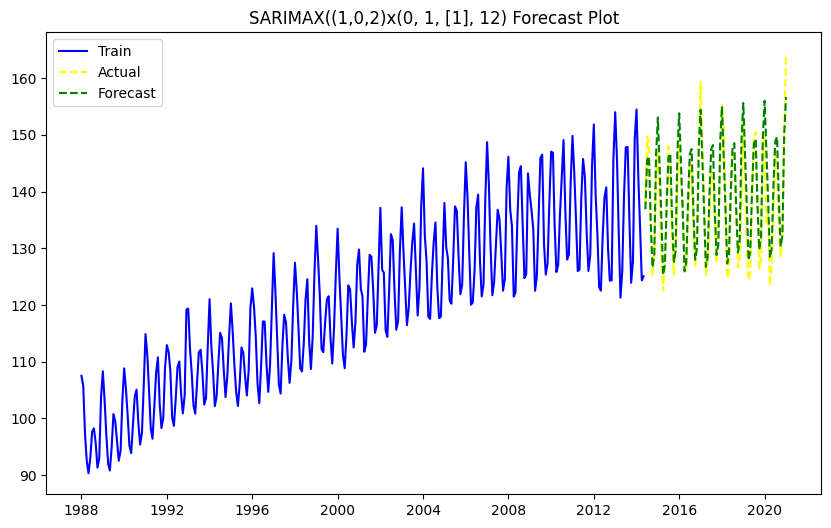

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(x_train, color='blue', label='Train')
plt.plot(x_test, color='yellow', label='Actual', linestyle='--')
plt.plot(forecast_mean, color='green', label='Forecast', linestyle='--')
plt.legend()
plt.title("SARIMAX((1,0,2)x(0, 1, [1], 12) Forecast Plot")
plt.show()


In [53]:
mae = mean_absolute_error(x_test, forecast_mean)
mape = mean_absolute_percentage_error(x_test, forecast_mean)
rmse = (mean_squared_error(x_test, forecast_mean) ** 0.5)

print("MAE (Mean Absolute Error): ", mae)
print("MAPE (Mean Absolute Percentage Error): ", mape)
print("RMSE (Root Mean Squared Error): ",rmse)

MAE (Mean Absolute Error):  3.015811172107404
MAPE (Mean Absolute Percentage Error):  0.02184209293682879
RMSE (Root Mean Squared Error):  3.821909822692227
